# Analyze Deformed Tadpole Output from Trex
This notebook takes output data from the [Trex](https://github.com/mooch443/trex) compute vision tool and runs exploratory data analysis on the information provided for each tadpole.

### Set Parameters for Analysis

In [1]:
TREX_OUTPUT_DATA_PATH = "/Users/jstremme/Videos/data/"
COLLISION_THRESHOLD = 0.1

### Install Required Libraries

In [2]:
!pip install -q numpy
!pip install -q pandas
!pip install -q matplotlib

### Import Installed Libraries

In [3]:
# Built-In
import glob
import random

# External
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Print External Library Versions for Reproducibility

In [4]:
np.__version__

'1.19.5'

In [5]:
pd.__version__

'1.3.1'

In [6]:
mpl.__version__

'3.4.2'

### View Tadpole Data Files

In [7]:
all_tadpole_data_files = glob.glob(TREX_OUTPUT_DATA_PATH + '*.npz')

In [8]:
all_tadpole_data_files

['/Users/jstremme/Videos/data/black-pebble_tadpole12.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole13.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole11.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole10.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole9.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole28.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole14.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole15.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole29.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole8.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole17.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole16.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole6.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole27.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole26.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole7.npz',
 '/Users/jstremme/Videos/data/black-pebble_tadpole5.npz',
 '

### Show Available Tadpole Data for a Random Tadpole
The `sample_tadpole_data` object contains information available for a single tadpole tracked by Trex.

In [9]:
sample_tadpole_data_files = random.choice(all_tadpole_data_files)
sample_tadpole_data = np.load(sample_tadpole_data_files)

In [10]:
sample_tadpole_data.files

['time',
 'num_pixels',
 'normalized_midline',
 'midline_x',
 'ACCELERATION#wcentroid',
 'SPEED#pcentroid',
 'midline_length',
 'Y#wcentroid',
 'X',
 'frame',
 'MIDLINE_OFFSET',
 'X#wcentroid',
 'SPEED#wcentroid',
 'VY',
 'missing',
 'VX',
 'SPEED',
 'Y',
 'ACCELERATION#pcentroid',
 'ANGULAR_A#centroid',
 'ANGULAR_V#centroid',
 'AX',
 'midline_y',
 'SPEED#smooth#wcentroid',
 'segment_length',
 'BORDER_DISTANCE#pcentroid',
 'ANGLE',
 'timestamp',
 'AY',
 'frame_segments',
 'segment_vxys']

### View Sample Tadpole Positions at Each Timestamp

In [11]:
sample_position_df = pd.DataFrame({
    'time': sample_tadpole_data['time'],
    'X': sample_tadpole_data['X'],
    'Y': sample_tadpole_data['Y']
})

In [12]:
sample_position_df

,time,X,Y
0,0.000000,17.479193,6.251856
1,0.034482,17.487059,6.222571
2,0.068965,17.424402,6.199133
3,0.103448,17.403387,6.178626
4,0.137931,17.415174,6.105839
...,...,...,...
37934,1308.068970,3.352165,9.385166
37935,1308.103394,3.614345,9.431245
37936,1308.137939,3.686374,9.027309
37937,1308.172363,3.528723,8.727408


### Review and Drop Frames with Infinite X, Y Values

In [13]:
sample_position_df.shape

(37939, 3)

In [14]:
sample_position_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sample_position_df.dropna(inplace=True)

In [15]:
sample_position_df.shape

(31503, 3)

### Plot Coordinates in Time for Non-Missing Frames
We could plot all tadpoles with different colors on the same 3D graph, maybe with mpld3 or another tool that allows for close inspection.

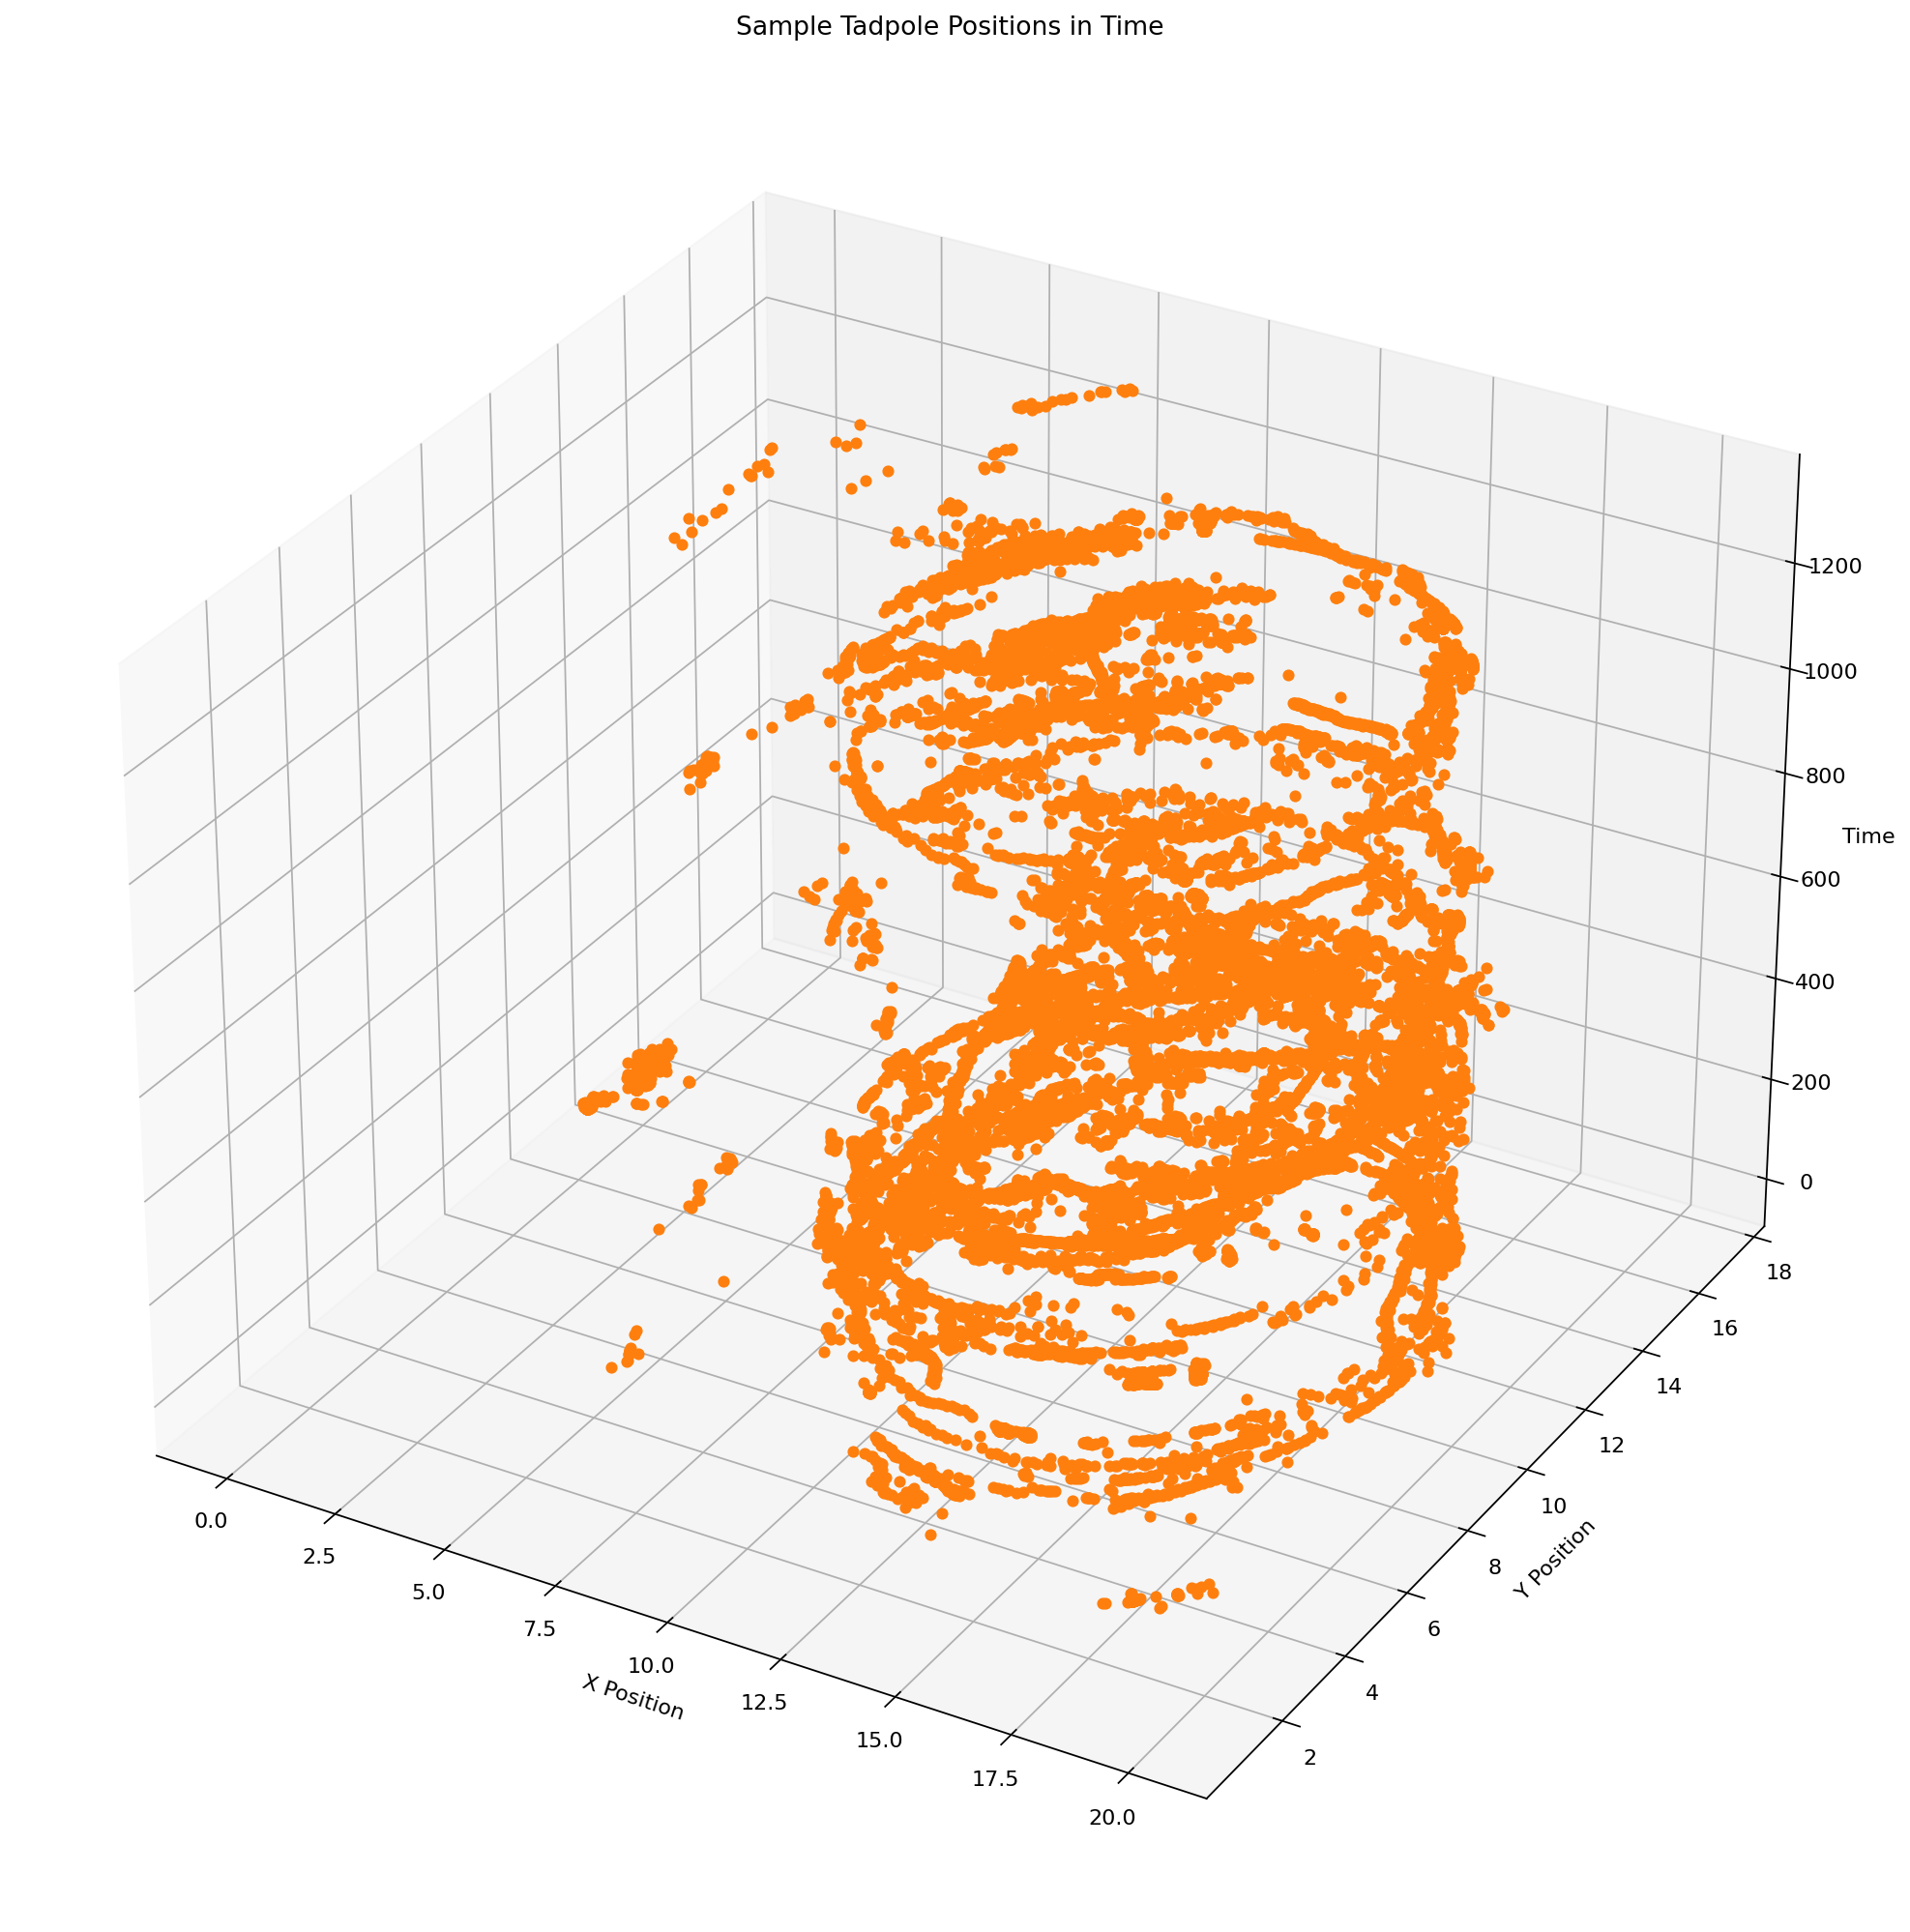

In [16]:
fig = plt.figure(figsize=(16, 16), dpi=160)
ax = fig.add_subplot(projection='3d')

for record in sample_position_df.iterrows():
    xs = record[1]['X']
    ys = record[1]['Y']
    zs = record[1]['time']
    ax.scatter(xs, ys, zs, marker='o', c='#ff7f0e')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Time')

plt.title('Sample Tadpole Positions in Time')
plt.show()

### Load Data for All Tadpoles
Times don't naturally align, as some time steps are missing for some tadpoles.

In [17]:
# df = pd.DataFrame({'time': range(n)})
# for i, tadpole_file in enumerate(all_tadpole_data_files):
    
#     # Retrieve tadpole name from file
#     tadpole_name = tadpole_file.split('/')[-1].split('tadpole')[-1].split('.')[0]
    
#     # Load tadpole data
#     tadpole_data = np.load(tadpole_file)
    
#     # Add new tadpole columns
#     df[f'{tadpole_name}_time'] = tadpole_data['time']
#     df[f'{tadpole_name}_X'] = tadpole_data['X']
#     df[f'{tadpole_name}_Y'] = tadpole_data['Y']

### View Sample of All Tadpole Data

In [18]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     display(df.sample(n=50))

### Compute Collisions
There are smart ways to go about this by bucketing or saving previous positions as we iterate through comparisons.  For now, let's just define what a collision is.  We'll need some logic to iterate through pairs of tadpoles at a given frame and call the `compute_collisions` function. We can then parallel process these pairwise comparisons across all frames using something like ray.

Consider other ways to handle inf values.

In [19]:
def compute_collisions(a, b):
    """
    Return 1 if coordiantes a and b represent a collision,
    otherise return 0.
    """
    
    # If one coordinate contains an infinite value
    # don't count this coordiante pair as a collision
    if np.inf in a or np.inf in b:
        return 0
    
    # Compute L2 norm (euclidean distance)
    dist = np.linalg.norm(a-b, ord=2)
    if dist < COLLISION_THRESHOLD:
        return 1
    else:
        return 0